# Analysis of corrupted data files
## File 1: Group_4_weather_in_denver

In [2]:
# loading pandas for creating a dataframe
import pandas as pd 

# loading the data
df= pd.read_csv('Group_4_Weather_in_Denver_corrupted.txt', sep=',')

## Taking a look at the datas structure

In [4]:
#displaying the first few rows
df.head(5)

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,TEMP,TEMP_ATTRIBUTES,DEWP,DEWP_ATTRIBUTES,...,MXSPD,GUST,MAX,MAX_ATTRIBUTES,MIN,MIN_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNDP,FRSHTT
0,72565003017,2018-01-01,39.8328,-104.6575,1650.2,"DENVER INTERNATIONAL AIRPORT, CO US",284.75,24,5.5,24,...,9.9,999.9,28.0,,3.0,,0.0,G,999.9,1000
1,72565003017,2018-01-02,39.8328,-104.6575,1650.2,"DENVER INTERNATIONAL AIRPORT, CO US",294.35,24,7.3,24,...,9.9,999.9,43.0,,3.0,,0.0,G,999.9,0
2,72565003017,2018-01-03,39.8328,-104.6575,1650.2,"DENVER INTERNATIONAL AIRPORT, CO US",294.35,24,3.0,24,...,15.9,24.1,53.1,,10.9,,0.0,G,999.9,0
3,72565003017,2018-01-04,39.8328,-104.6575,1650.2,"DENVER INTERNATIONAL AIRPORT, CO US",307.75,24,11.6,24,...,8.9,999.9,53.1,,17.1,,0.0,G,999.9,0
4,72565003017,2018-01-05,39.8328,-104.6575,1650.2,"DENVER INTERNATIONAL AIRPORT, CO US",309.45,24,11.4,24,...,14.0,999.9,55.9,,23.0,,0.0,G,999.9,0


In [5]:
#getting some basic info
df.info()
#finding out how man rows the dataset contains
total_rows = len(df)

print(total_rows)
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   STATION           366 non-null    object 
 1   DATE              366 non-null    object 
 2   LATITUDE          366 non-null    float64
 3   LONGITUDE         366 non-null    float64
 4   ELEVATION         366 non-null    float64
 5   NAME              366 non-null    object 
 6   TEMP              366 non-null    object 
 7   TEMP_ATTRIBUTES   366 non-null    int64  
 8   DEWP              366 non-null    float64
 9   DEWP_ATTRIBUTES   366 non-null    int64  
 10  SLP               366 non-null    float64
 11  SLP_ATTRIBUTES    366 non-null    int64  
 12  STP               366 non-null    float64
 13  STP_ATTRIBUTES    366 non-null    object 
 14  VISIB             366 non-null    float64
 15  VISIB_ATTRIBUTES  366 non-null    int64  
 16  WDSP              366 non-null    float64
 1

### First error: Column date seems to be an object. We should change it to datetime_object for more convenience in mathematic operations

In [7]:

#converting the object to a datetime object, using coerce to be sure that every value is converted or given as NaT (not a time)
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   STATION           366 non-null    object        
 1   DATE              366 non-null    datetime64[ns]
 2   LATITUDE          366 non-null    float64       
 3   LONGITUDE         366 non-null    float64       
 4   ELEVATION         366 non-null    float64       
 5   NAME              366 non-null    object        
 6   TEMP              366 non-null    object        
 7   TEMP_ATTRIBUTES   366 non-null    int64         
 8   DEWP              366 non-null    float64       
 9   DEWP_ATTRIBUTES   366 non-null    int64         
 10  SLP               366 non-null    float64       
 11  SLP_ATTRIBUTES    366 non-null    int64         
 12  STP               366 non-null    float64       
 13  STP_ATTRIBUTES    366 non-null    object        
 14  VISIB             366 non-

### As we can see there are 366 rows in total. There are 366 non-null values in each column. Therefore no n/a values are found. 

In [9]:
df.describe()

,DATE,LATITUDE,LONGITUDE,ELEVATION,TEMP_ATTRIBUTES,DEWP,DEWP_ATTRIBUTES,SLP,SLP_ATTRIBUTES,STP,...,VISIB_ATTRIBUTES,WDSP,WDSP_ATTRIBUTES,MXSPD,GUST,MAX,MIN,PRCP,SNDP,FRSHTT
count,366,366.000000,366.000000,366.000000,366.000000,366.000000,366.0,366.000000,366.000000,366.000000,...,366.0,366.000000,366.0,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2018-07-12 11:28:31.475409920,39.857874,-104.364589,2096.565574,24.049180,29.465847,24.0,1013.763934,22.609290,833.096175,...,24.0,8.903279,24.0,18.470492,321.093989,97.272404,36.457377,0.024016,950.807923,12351.584699
min,2018-01-01 00:00:00,39.832800,-104.657500,1650.200000,24.000000,-4.100000,24.0,996.900000,10.000000,819.300000,...,24.0,4.100000,24.0,7.000000,14.000000,19.000000,-7.100000,0.000000,1.200000,0.000000
25%,2018-04-02 06:00:00,39.832800,-104.657500,1650.200000,24.000000,18.025000,24.0,1008.925000,23.000000,829.900000,...,24.0,7.200000,24.0,14.000000,26.000000,55.900000,23.000000,0.000000,999.900000,0.000000
50%,2018-07-02 12:00:00,39.832800,-104.657500,1650.200000,24.000000,28.500000,24.0,1013.500000,24.000000,833.450000,...,24.0,8.450000,24.0,18.100000,33.000000,69.100000,34.000000,0.000000,999.900000,0.000000
75%,2018-10-01 18:00:00,39.832800,-104.657500,1650.200000,24.000000,42.275000,24.0,1018.575000,24.000000,836.500000,...,24.0,10.200000,24.0,22.900000,999.900000,88.000000,52.825000,0.000000,999.900000,10000.000000
max,2028-10-30 00:00:00,49.009724,2.547778,165020.000000,42.000000,61.500000,24.0,1038.300000,24.000000,845.400000,...,24.0,23.200000,24.0,40.000000,999.900000,9999.900000,68.000000,0.660000,999.900000,111110.000000
std,NaN,0.479686,5.603710,8539.476244,0.940875,14.717201,0.0,7.115144,2.706222,5.026907,...,0.0,2.557737,0.0,5.958731,445.623409,519.371598,17.204341,0.078841,216.151889,30537.537551


### Trying to find duplicates

In [11]:
#show duplicated rows
print(df[df.duplicated()])
# construct a string that shows the number of duplicates
print(f"number of duplicates: {df.duplicated().sum()}")

         STATION       DATE  LATITUDE  LONGITUDE  ELEVATION  \
365  72565003017 2018-12-31   39.8328  -104.6575     1650.2   

                                    NAME    TEMP  TEMP_ATTRIBUTES  DEWP  \
365  DENVER INTERNATIONAL AIRPORT, CO US    23.4               24  11.1   

     DEWP_ATTRIBUTES  ...  MXSPD  GUST   MAX MAX_ATTRIBUTES  MIN  \
365               24  ...   21.0  29.9  53.1                 7.0   

     MIN_ATTRIBUTES  PRCP  PRCP_ATTRIBUTES   SNDP  FRSHTT  
365                   0.0                G  999.9    1000  

[1 rows x 28 columns]
number of duplicates: 1


### Second error: there is a duplicated row. We can drop it very easily. 

In [13]:
#drop the duplicated row
df = df.drop_duplicates()
# check if it was dropped (length should be one less)
print(len(df))

365


### Lets take a look at the data and see if there are any outliers inside the int and float columns

In [15]:
# identify values that could be outliers by using 1.5 x IQR 
for column in df.select_dtypes(include=['float', 'int']).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    Outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]
    print(f"Outliers in column {column}:\n", Outliers)


Outliers in column LATITUDE:
          STATION       DATE   LATITUDE  LONGITUDE  ELEVATION  \
235  72565003017 2018-08-24  49.009724   2.547778     1650.2   

                                    NAME    TEMP  TEMP_ATTRIBUTES  DEWP  \
235  DENVER INTERNATIONAL AIRPORT, CO US    76.2               24  38.0   

     DEWP_ATTRIBUTES  ...  MXSPD  GUST   MAX MAX_ATTRIBUTES   MIN  \
235               24  ...   17.1  21.0  90.0                 57.9   

     MIN_ATTRIBUTES  PRCP  PRCP_ATTRIBUTES   SNDP  FRSHTT  
235                   0.0                G  999.9       0  

[1 rows x 28 columns]
Outliers in column LONGITUDE:
          STATION       DATE   LATITUDE  LONGITUDE  ELEVATION  \
235  72565003017 2018-08-24  49.009724   2.547778     1650.2   

                                    NAME    TEMP  TEMP_ATTRIBUTES  DEWP  \
235  DENVER INTERNATIONAL AIRPORT, CO US    76.2               24  38.0   

     DEWP_ATTRIBUTES  ...  MXSPD  GUST   MAX MAX_ATTRIBUTES   MIN  \
235               24  ...   

### Since we have no idea what the data means, because we dont have knowledge in this subject, this approach is not helpful this time.

### Lets see if they used different class names for categorization in columns

In [18]:
# show unique values for object columns
for column in df.select_dtypes(include=['object']).columns:
    print(f"Unique values per '{column}':\n", df[column].unique())


Unique values per 'STATION':
 ['72565003017' '72565003O17']
Unique values per 'NAME':
 ['DENVER INTERNATIONAL AIRPORT, CO US'
 'PARIS CHARLES DE GAULLE AIRPORT, FRANCE']
Unique values per 'TEMP':
 ['  284.75' '  294.35' '  307.75' '  309.45' '  313.35' '  312.95'
 '  306.35' '  321.35' '  322.45' '  304.15' '  308.45' '  304.35'
 '  309.05' '  297,95' '  283,45' '  300,25' '  314,15' '  322,95'
 '  43,9' '  26,9' '  26,1' '  29,1' '  29,5' '  42.4' '  35.9' '  30.1'
 '  35.2' '  34.7' '  47.2' '  43.2' '  27.5' '  31.3' '  43.0' '  29.3'
 '  36.8' '  33.1' '  46.8' '  36.2' '  15.2' '  18.2' '  20.7' '  30.9'
 '  45.9' '  24.8' '  38.1' '  48.8' '  20.6' '   5.0' '   8.7' '  16.3'
 '  20.8' '  26.9' '  38.2' '  33.6' '  45.6' '  54.8' '  55.1' '  31.8'
 '  40.3' '  52.1' '  47.3' '  32.9' '  35.8' '  40.5' '  46.9' '  51.2'
 '  42.5' '  42.0' '  44.5' '  35.1' '  36.4' '  53.8' '  60.0' '  49.9'
 '  50.5' '  42.6' '  34.5' '  38.4' '  34.2' '  39.3' '  46.1' '  33.2'
 '  50.1' '  43.6'

### This was helpful, since there are a lot of things that dont make sense: 

- 1) STATION is a number. The datatype should be int not object. (Third error)
- 2) TEMP is also number. There is no reason why this would be an object. (fourth error)
- 3) STP_ATTRIBUTES has the value 24 and twenty-four. I would also go for the number here. Having both doesnt make sense. (fifth error)
- 4) MAX and MIN_ATTRIBUTES seem to have a purpose of indicating some rows. Thats badly structured. But right now we dont really know if its important so we leave it. 
- 5) Also we see that TEMP contains some values with "." and some with ",". That should be changed aswell (error six)



In [20]:
# Issue 1: Convert STATION to Int64 by replacing non-numeric values with NaN, then casting to Int64
df['STATION'] = pd.to_numeric(df['STATION'], errors='coerce').astype('Int64')

# Issue 2: Convert TEMP to float by replacing non-numeric values with NaN, then casting to float
df['TEMP'] = pd.to_numeric(df['TEMP'], errors='coerce')

# Issue 3: Standardize STP_ATTRIBUTES by replacing 'twenty-four' with 24, then converting to Int64
df['STP_ATTRIBUTES'] = df['STP_ATTRIBUTES'].replace('twenty-four', 24)
df['STP_ATTRIBUTES'] = pd.to_numeric(df['STP_ATTRIBUTES'], errors='coerce').astype('Int64')

#Issue 4: Replace commas with dots in the TEMP column and convert to float
df['TEMP'] = df['TEMP'].astype(str).str.replace(',', '.').astype(float)

# Check the results
print(df.dtypes)
df.head()


STATION                      Int64
DATE                datetime64[ns]
LATITUDE                   float64
LONGITUDE                  float64
ELEVATION                  float64
NAME                        object
TEMP                       float64
TEMP_ATTRIBUTES              int64
DEWP                       float64
DEWP_ATTRIBUTES              int64
SLP                        float64
SLP_ATTRIBUTES               int64
STP                        float64
STP_ATTRIBUTES               Int64
VISIB                      float64
VISIB_ATTRIBUTES             int64
WDSP                       float64
WDSP_ATTRIBUTES              int64
MXSPD                      float64
GUST                       float64
MAX                        float64
MAX_ATTRIBUTES              object
MIN                        float64
MIN_ATTRIBUTES              object
PRCP                       float64
PRCP_ATTRIBUTES             object
SNDP                       float64
FRSHTT                       int64
dtype: object


,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,TEMP,TEMP_ATTRIBUTES,DEWP,DEWP_ATTRIBUTES,...,MXSPD,GUST,MAX,MAX_ATTRIBUTES,MIN,MIN_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNDP,FRSHTT
0,72565003017,2018-01-01,39.8328,-104.6575,1650.2,"DENVER INTERNATIONAL AIRPORT, CO US",284.75,24,5.5,24,...,9.9,999.9,28.0,,3.0,,0.0,G,999.9,1000
1,72565003017,2018-01-02,39.8328,-104.6575,1650.2,"DENVER INTERNATIONAL AIRPORT, CO US",294.35,24,7.3,24,...,9.9,999.9,43.0,,3.0,,0.0,G,999.9,0
2,72565003017,2018-01-03,39.8328,-104.6575,1650.2,"DENVER INTERNATIONAL AIRPORT, CO US",294.35,24,3.0,24,...,15.9,24.1,53.1,,10.9,,0.0,G,999.9,0
3,72565003017,2018-01-04,39.8328,-104.6575,1650.2,"DENVER INTERNATIONAL AIRPORT, CO US",307.75,24,11.6,24,...,8.9,999.9,53.1,,17.1,,0.0,G,999.9,0
4,72565003017,2018-01-05,39.8328,-104.6575,1650.2,"DENVER INTERNATIONAL AIRPORT, CO US",309.45,24,11.4,24,...,14.0,999.9,55.9,,23.0,,0.0,G,999.9,0


### Lets also check the other columns for unique values. 

In [22]:
# Iterate over each column and display unique values
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Column '{column}' has {len(unique_values)} unique values:")
    print(unique_values)


Column 'STATION' has 2 unique values:
<IntegerArray>
[72565003017, <NA>]
Length: 2, dtype: Int64
Column 'DATE' has 365 unique values:
<DatetimeArray>
['2018-01-01 00:00:00', '2018-01-02 00:00:00', '2018-01-03 00:00:00',
 '2018-01-04 00:00:00', '2018-01-05 00:00:00', '2018-01-06 00:00:00',
 '2018-01-07 00:00:00', '2018-01-08 00:00:00', '2018-01-09 00:00:00',
 '2018-01-10 00:00:00',
 ...
 '2018-12-22 00:00:00', '2018-12-23 00:00:00', '2018-12-24 00:00:00',
 '2018-12-25 00:00:00', '2018-12-26 00:00:00', '2018-12-27 00:00:00',
 '2018-12-28 00:00:00', '2018-12-29 00:00:00', '2018-12-30 00:00:00',
 '2018-12-31 00:00:00']
Length: 365, dtype: datetime64[ns]
Column 'LATITUDE' has 2 unique values:
[39.8328   49.009724]
Column 'LONGITUDE' has 2 unique values:
[-104.6575      2.547778]
Column 'ELEVATION' has 2 unique values:
[  1650.2 165020. ]
Column 'NAME' has 2 unique values:
['DENVER INTERNATIONAL AIRPORT, CO US'
 'PARIS CHARLES DE GAULLE AIRPORT, FRANCE']
Column 'TEMP' has 271 unique values:


### 'Gust' and 'Max' has values that look like placeholders (999.9 and 9999.9) 
Lets replace these values with the mean of the non-outliers value. 

In [24]:
# Calculate the mean for 'GUST' and 'MAX' columns, excluding the outliers
gust_mean = df.loc[df["GUST"] != 999.9, "GUST"].mean()
max_mean = df.loc[df["MAX"] != 9999.9, "MAX"].mean()

# Replace outlier values with the mean in 'GUST' and 'MAX'
df.loc[df["GUST"] == 999.9, "GUST"] = gust_mean
df.loc[df["MAX"] == 9999.9, "MAX"] = max_mean

# Display the DataFrame to confirm the changes
df


,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,TEMP,TEMP_ATTRIBUTES,DEWP,DEWP_ATTRIBUTES,...,MXSPD,GUST,MAX,MAX_ATTRIBUTES,MIN,MIN_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNDP,FRSHTT
0,72565003017,2018-01-01,39.8328,-104.6575,1650.2,"DENVER INTERNATIONAL AIRPORT, CO US",284.75,24,5.5,24,...,9.9,29.417647,28.0,,3.0,,0.0,G,999.9,1000
1,72565003017,2018-01-02,39.8328,-104.6575,1650.2,"DENVER INTERNATIONAL AIRPORT, CO US",294.35,24,7.3,24,...,9.9,29.417647,43.0,,3.0,,0.0,G,999.9,0
2,72565003017,2018-01-03,39.8328,-104.6575,1650.2,"DENVER INTERNATIONAL AIRPORT, CO US",294.35,24,3.0,24,...,15.9,24.100000,53.1,,10.9,,0.0,G,999.9,0
3,72565003017,2018-01-04,39.8328,-104.6575,1650.2,"DENVER INTERNATIONAL AIRPORT, CO US",307.75,24,11.6,24,...,8.9,29.417647,53.1,,17.1,,0.0,G,999.9,0
4,72565003017,2018-01-05,39.8328,-104.6575,1650.2,"DENVER INTERNATIONAL AIRPORT, CO US",309.45,24,11.4,24,...,14.0,29.417647,55.9,,23.0,,0.0,G,999.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,72565003017,2018-12-27,39.8328,-104.6575,1650.2,"DENVER INTERNATIONAL AIRPORT, CO US",23.70,24,13.1,24,...,18.1,28.000000,37.0,,12.9,,0.0,G,999.9,1000
361,72565003017,2018-12-28,39.8328,-104.6575,1650.2,"DENVER INTERNATIONAL AIRPORT, CO US",16.40,24,6.8,24,...,19.0,29.417647,30.0,,10.0,,0.0,G,999.9,1000
362,72565003017,2018-12-29,39.8328,-104.6575,1650.2,"DENVER INTERNATIONAL AIRPORT, CO US",17.50,24,4.7,24,...,8.0,29.417647,39.0,,5.0,,0.0,G,999.9,1000
363,72565003017,2018-12-30,39.8328,-104.6575,1650.2,"DENVER INTERNATIONAL AIRPORT, CO US",34.80,24,7.9,24,...,15.9,29.417647,52.0,*,21.9,*,0.0,G,999.9,0


No further errors could be found. Here is a list of all found errors: 

- date is not an datetime object
- duplicated rows
- object instead of number
- object instead of float 
- mixed data types in one column (24 and twenty-four)
- mixed "." and "." for float numbers 
- placeholder values (999.9 and 9999.9 in GUST and MAX

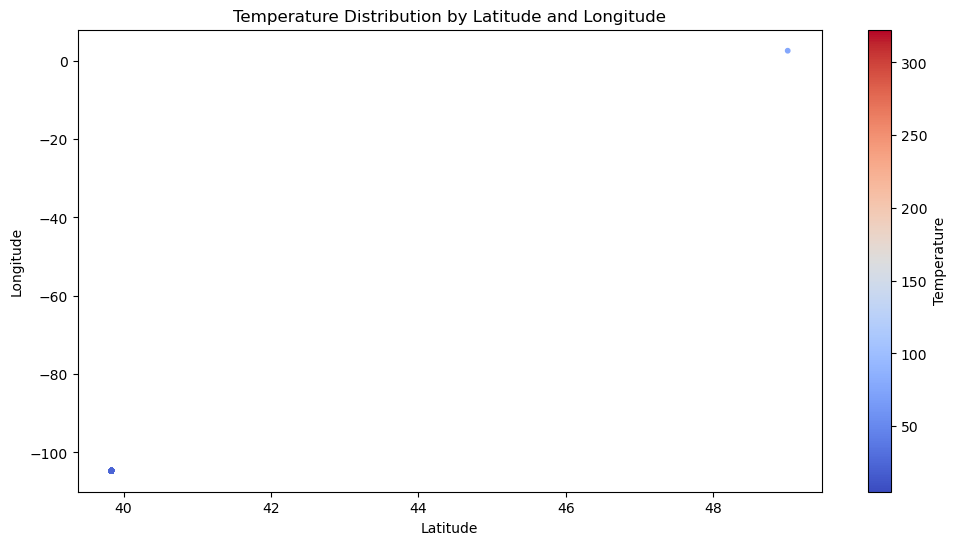

In [60]:
#5. Check distribution
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting temperature based on latitude and longitude
plt.figure(figsize=(12, 6))
sc = plt.scatter(df['LATITUDE'], df['LONGITUDE'], c=df['TEMP'], cmap='coolwarm', s=10)
plt.colorbar(sc, label="Temperature")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Temperature Distribution by Latitude and Longitude")
plt.show()


# plt.subplot(1, 2, 2)
# sns.histplot(df['LATITUDE'], kde=True, color = "Blue")
# plt.title('Distribution of latitude')
# plt.show()

